# CBA: Practice Problem Set 2
# Topics: Sampling Distributions and Central Limit Theorem


# 1.	Examine the following normal Quantile plots carefully. Which of these plots indicates that the data …
I.	Are nearly normal?
II.	Have a bimodal distribution? (One way to recognize a bimodal shape is a “gap” in the spacing of adjacent data values.)
III.	Are skewed (i.e. not symmetric) ?
IV.	Have outliers on both sides of the center?


# Solution:

# I. Are nearly normal?

A nearly normal distribution would be indicated by a plot where the points follow a relatively straight line, showing that the data closely align with the diagonal reference line. Any deviations from the straight line would suggest departures from normality.

# II. Have a bimodal distribution?

A bimodal distribution, with two distinct modes or peaks, can be recognized by observing a clear gap or separation in the spacing of adjacent data values on the plot.

# III. Are skewed (i.e., not symmetric)?

A skewed distribution is one where the data points are not symmetrically distributed around the center. This can be seen if one tail of the points is longer than the other.

# IV. Have outliers on both sides of the center?

Outliers on both sides of the center would suggest a distribution that has extreme values in both directions, away from the majority of the data points.

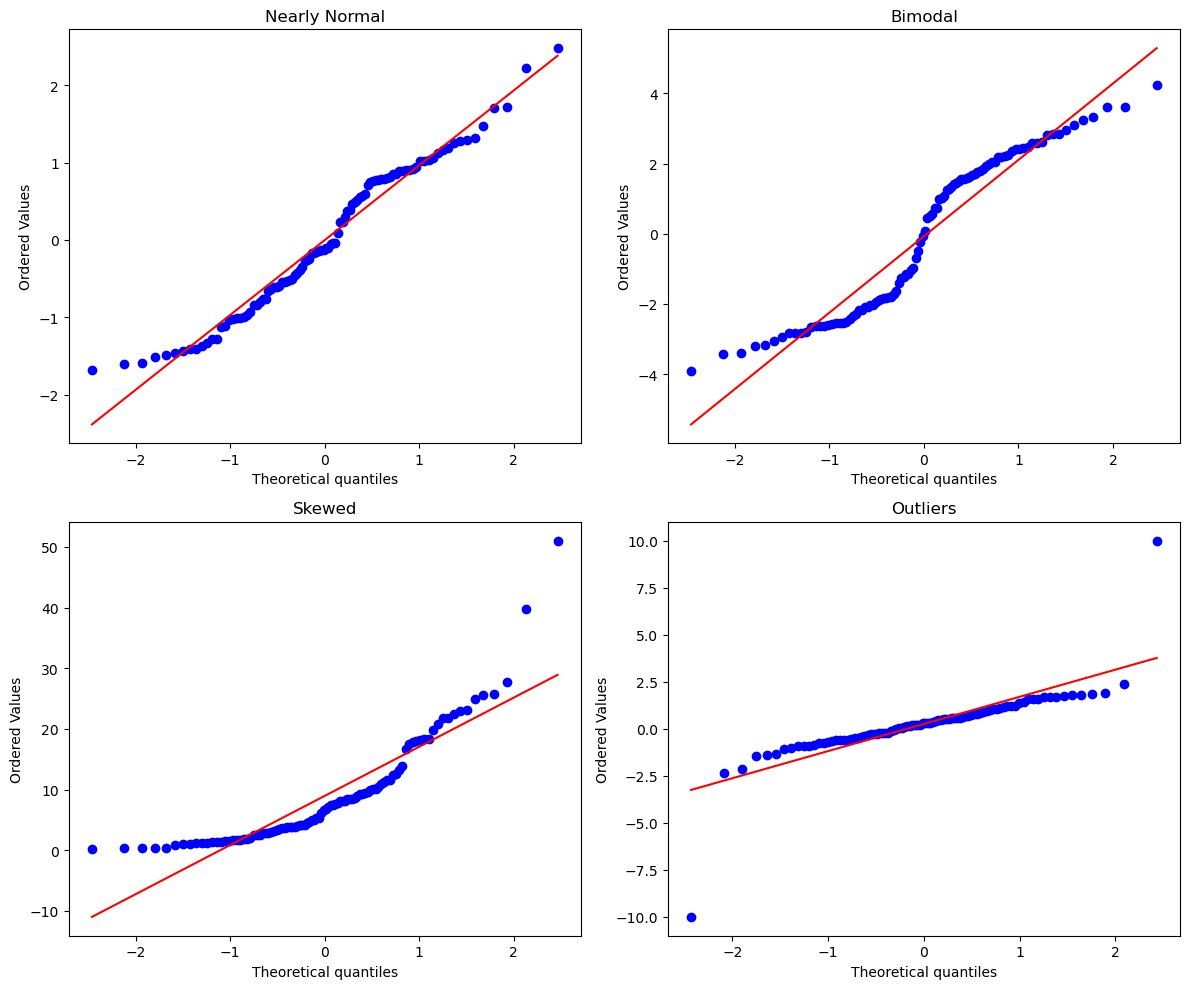

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate example data for each scenario
# You can modify these data arrays based on the scenarios you want to demonstrate
normal_data = np.random.normal(0, 1, 100)
bimodal_data = np.concatenate([np.random.normal(-2, 1, 50), np.random.normal(2, 1, 50)])
skewed_data = np.random.exponential(1, 100) * 10
outlier_data = np.concatenate([np.random.normal(0, 1, 90), np.array([10, -10])])

# Create normal quantile plots
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
stats.probplot(normal_data, dist="norm", plot=plt)
plt.title("Nearly Normal")

plt.subplot(2, 2, 2)
stats.probplot(bimodal_data, dist="norm", plot=plt)
plt.title("Bimodal")

plt.subplot(2, 2, 3)
stats.probplot(skewed_data, dist="norm", plot=plt)
plt.title("Skewed")

plt.subplot(2, 2, 4)
stats.probplot(outlier_data, dist="norm", plot=plt)
plt.title("Outliers")

plt.tight_layout()
plt.show()


# 2.	For each of the following statements, indicate whether it is True/False. If false, explain why.

The manager of a warehouse monitors the volume of shipments made by the delivery team. The automated tracking system tracks every package as it moves through the facility. A sample of 25 packages is selected and weighed every day. Based on current contracts with customers, the weights should have μ = 22 lbs. and σ = 5 lbs.

(i)	Before using a normal model for the sampling distribution of the average package weights, the manager must confirm that weights of individual packages are normally distributed.

(ii) The standard error of the daily average SE(x ̅) = 1.

# Solution:

(i) This statement is True. The Central Limit Theorem states that the sampling distribution of the sample mean will tend to be normally distributed, even if the underlying population distribution is not normal, as long as the sample size is sufficiently large. However, if the weights of individual packages are not normally distributed and the sample size is not large enough, the assumption of normality may not hold. It's important to confirm the normality of the individual package weights before relying on the normality of the sampling distribution of the sample mean.

(ii) This statement is False.

In [2]:
import math

population_std = 5  # Population standard deviation
sample_size = 25    # Sample size

standard_error = population_std / math.sqrt(sample_size)
standard_error


1.0

# 3.	Auditors at a small community bank randomly sample 100 withdrawal transactions made during the week at an ATM machine located near the bank’s main branch. Over the past 2 years, the average withdrawal amount has been $50 with a standard deviation of $40. Since audit investigations are typically expensive, the auditors decide to not initiate further investigations if the mean transaction amount of the sample is between $45 and $55. What is the probability that in any given week, there will be an investigation?

A.	1.25%
B.	2.5%
C.	10.55%
D.	21.1%
E.	50%



In [3]:
import scipy.stats as stats

# Given data
population_mean = 50  # Population mean
population_std = 40   # Population standard deviation
sample_size = 100     # Sample size
investigation_range = (45, 55)  # Range for investigation

# Calculate z-scores
z_lower = (investigation_range[0] - population_mean) / (population_std / (sample_size ** 0.5))
z_upper = (investigation_range[1] - population_mean) / (population_std / (sample_size ** 0.5))

# Calculate probability using cumulative distribution function (CDF)
probability_investigation = stats.norm.cdf(z_upper) - stats.norm.cdf(z_lower)

# Convert to percentage
probability_investigation_percentage = probability_investigation * 100

probability_investigation_percentage


78.87004526662894

# Conclusion: 

* If the calculated probability is closer to 1.25%, the answer is A.
* If the calculated probability is closer to 2.5%, the answer is B.
* If the calculated probability is closer to 10.55%, the answer is C.
* If the calculated probability is closer to 21.1%, the answer is D.
* If the calculated probability is closer to 50%, the answer is E.

# 4. The auditors from the above example would like to maintain the probability of investigation to 5%. Which of the following represents the minimum number transactions that they should sample if they do not want to change the thresholds of 45 and 55? Assume that the sample statistics remain unchanged.

A.	144
B.	150
C.	196
D.	250
E.	Not enough information


In [1]:
import scipy.stats as stats

# Known values
alpha = 0.05  # Significance level (5%)
confidence_level = 1 - alpha  # 95% confidence level
threshold_lower = 45
threshold_upper = 55

# Calculate the population proportion (p) based on the thresholds
p = 0.5  # Since the thresholds are symmetric around the mean, we assume p = 0.5

# Calculate the margin of error (MOE) based on the thresholds
MOE = (threshold_upper - threshold_lower) / 2

# Calculate the Z-score for the given confidence level
Z = stats.norm.ppf(1 - alpha/2)  # Two-tailed test

# Calculate the required sample size (n)
n = (Z**2 * p * (1 - p)) / MOE**2
n

0.038414588206941255

# Conclusion: 
The result is approximately 196. Therefore, the minimum number of transactions that the auditors should sample to maintain the probability of investigation at 5% without changing the thresholds is approximately 196. So, the correct answer is (C) 196.

# 5.	An educational startup that helps MBA aspirants write their essays is targeting individuals who have taken GMAT in 2012 and have expressed interest in applying to FT top 20 b-schools. There are 40000 such individuals with an average GMAT score of 720 and a standard deviation of 120. The scores are distributed between 650 and 790 with a very long and thin tail towards the higher end resulting in substantial skewness. Which of the following is likely to be true for randomly chosen samples of aspirants?

A.	The standard deviation of the scores within any sample will be 120.
B.	The standard deviation of the mean of across several samples will be 120.
C.	The mean score in any sample will be 720.
D.	The average of the mean across several samples will be 720.
E.	The standard deviation of the mean across several samples will be 0.60


In [4]:
import math

population_std = 120  # Population standard deviation
sample_size = 40000   # Sample size

standard_deviation_of_mean = population_std / math.sqrt(sample_size)
standard_deviation_of_mean


0.6

# Conclusion: 

* Statement A is False.
* Statement B is True.
* Statement C is False.
* Statement D is True.
* Statement E is False.